In [6]:
import torch
import yolo
from PIL import Image
from torchvision import transforms


ckpt_path = "Var/checkpoint-100.pth"
N = 4
s = 2.0


# COCO dataset, 80 classes
classes = (
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
    "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
    "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair",
    "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote",
    "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
    "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush")

model = yolo.YOLOv5(80, img_sizes=420, score_thresh=0.3, nms_thresh=0.3, N=N, s=s)
model.eval()

checkpoint = torch.load(ckpt_path)
model.load_state_dict(checkpoint['model'])

<All keys matched successfully>

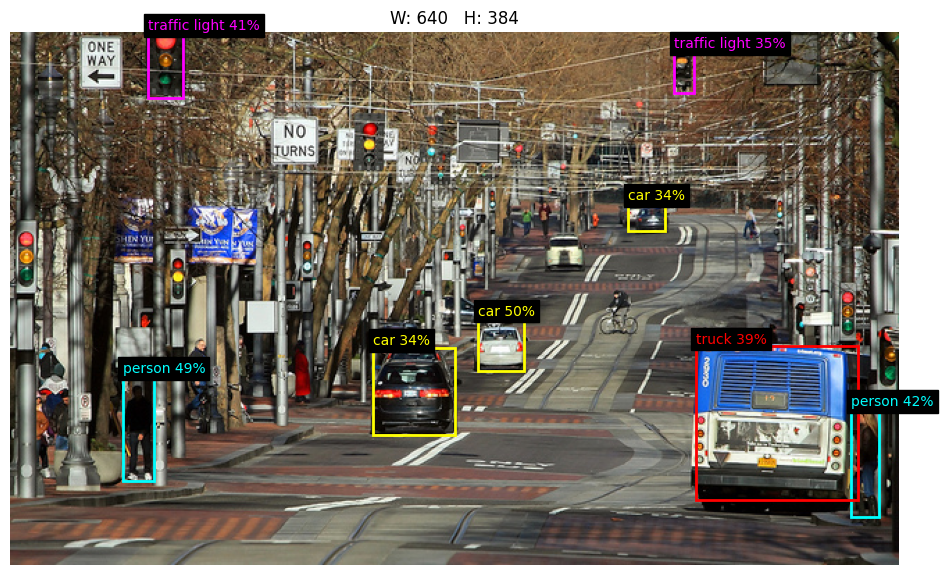

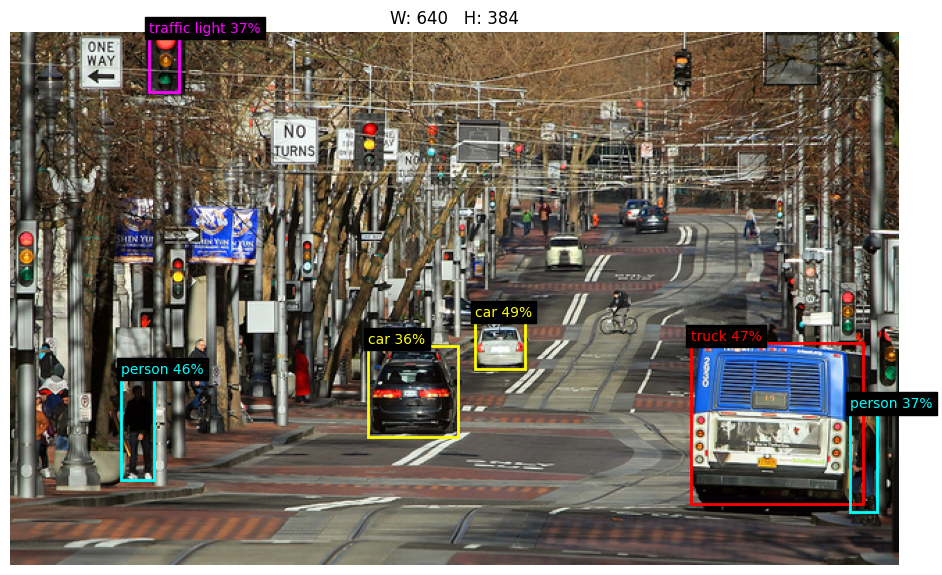

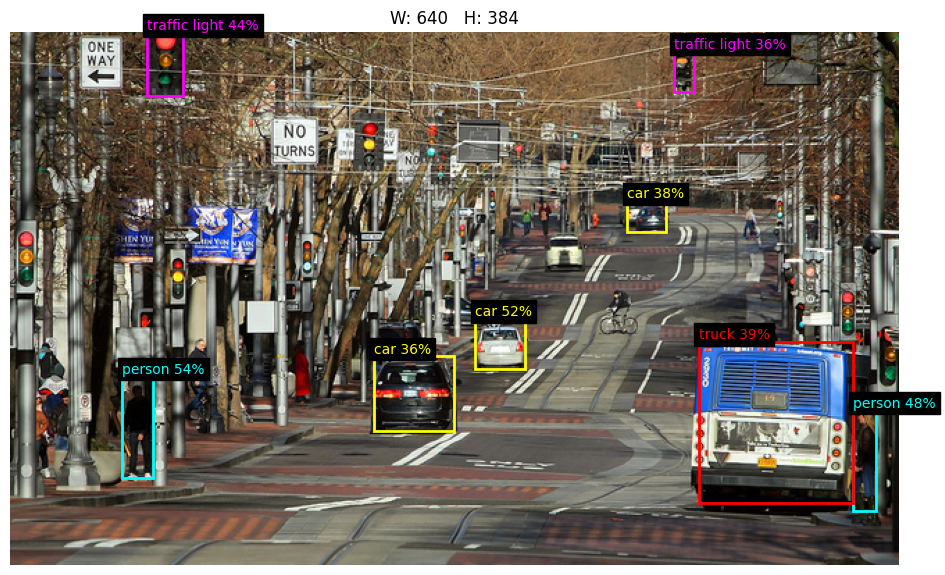

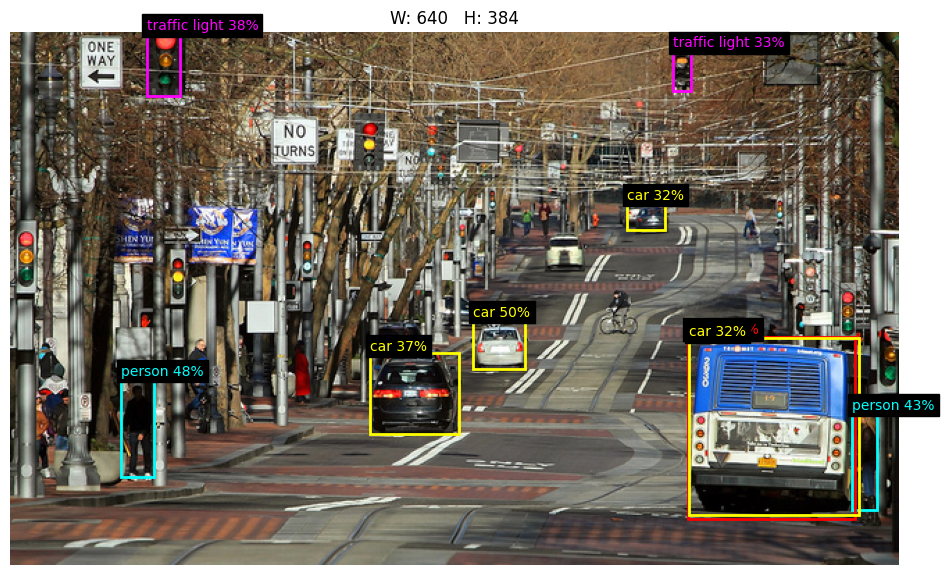

In [7]:
img = Image.open(r'images\000.jpg').convert("RGB")
img = transforms.ToTensor()(img)

model.head.merge = False

images = [img]*N
results, losses = model(images)
yolo.show(images, results, classes, save="r000.jpg")

In [ ]:
import os 
path = 'data/samples'
files = os.listdir('data\samples')
for file in files:
    img = Image.open(os.path.join(path, file)).convert("RGB")
    img = transforms.ToTensor()(img)
    print(img.shape)
    model.head.merge = False

    images = [img]*N
    results, losses = model(images)
    yolo.show(images, results, classes, save="r000.jpg")

In [10]:
# below is to test COCO val2017 dataset

In [11]:
import os

use_cuda = False
dataset = "coco" # currently only support VOC and COCO datasets
file_root = "data/coco2017/val2017"
ann_file = "data/coco2017/annotations/instances_val2017.json"
output_dir = "yolov5s_val2017"

# create output directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
# choose device and show GPU information
device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
cuda = device.type == "cuda"
if cuda: yolo.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = yolo.datasets(dataset, file_root, ann_file, train=True)
dl = torch.utils.data.DataLoader(ds, shuffle=True, collate_fn=yolo.collate_wrapper, pin_memory=cuda)
# DataPrefetcher behaves like PyTorch's DataLoader, but it outputs CUDA tensors
d = yolo.DataPrefetcher(dl) if cuda else dl

model.to(device)

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    if "ema" in checkpoint:
        model.load_state_dict(checkpoint["ema"][0])
        print(checkpoint["eval_info"])
    else:
        model.load_state_dict(checkpoint)
    del checkpoint
    if cuda: torch.cuda.empty_cache()
    
for p in model.parameters():
    p.requires_grad_(False)


device: cpu
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.362
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.243
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.349
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.207
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.294
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.301
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.334
 Averag